#Atividade
 
 
*   Entregar um documento COLAB do Google com os resultados da classificação de um conjunto de dados da base UCI, desbalanceado, comparando dois tipos de validação cruzada.

#### 1.   *Importações dos módulos gerais*

    * Aqui serão importados o numpy, o pandas e o matplotlib/seaborn para plots




In [5]:
# This is not strictly for a Python rather. 
%matplotlib inline

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
 
sns.set()                         #Configura os plots do matplotlib para terem os mesmos estilos do seaborn
sns.set_style("whitegrid")        #Alterando o estilo do plot para melhor vizualização no colab (Tema escuro fica ruim de ver o fundo)

    *  Aqui serão importados os módulos do sklearn para realizar o K-Nearest Neighbors

In [7]:
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score, KFold, LeaveOneOut

In [29]:
def KNN_k_find(x: np.ndarray, y: np.ndarray, max_k: int) -> list:
  '''
  returns a list with the accuracy of a K-Nearest Neighbors for different "n_neighbors" values

  PARAMETERS:
      x (np.ndarray): Data Predictors
      y (np.ndarray): Data Classes
      max_k (int): Max value of "n_neighbors"

  RETURNS:
      (list): list with different values of accuracy stored in

  '''
  accuracy = []

  for _ in range(1, max_k + 1):

    clf_knn = KNN(n_neighbors = _)
    clf_knn.fit(x, y)
    test_predict = clf_knn.predict(x)
    result = cross_val_score(clf_knn, x, y, cv = 10)
    accuracy.append(round(result.mean()*100, 4))

  return accuracy

#### 2.   Leitura dos Datasets
      *   O dataset "Wine UCI"
      *   O dataset será retirado de um repositório pessoal do GITHUB


In [9]:
data = pd.read_csv('https://raw.githubusercontent.com/Berawecker/Datasets/main/Wine%20UCI.csv')
data

,Label,Alcohol,Malic Acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1.0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,1.0,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,1.0,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,1.0,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,1.0,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174,3.0,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,3.0,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,3.0,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0
177,3.0,14.13,4.10,2.74,24.5,96.0,2.05,0.76,0.56,1.35,9.20,0.61,1.60,560.0


#### 3.   Limpeza dos dados

A única limpeza necessária no dataset é a remoção da ultima linha que é apenas composta por dados faltantes.

In [10]:
data = data.drop(178, axis = 0)
data

,Label,Alcohol,Malic Acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1.0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,1.0,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,1.0,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,1.0,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,1.0,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3.0,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,3.0,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,3.0,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,3.0,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


#### 4.   Gráficos dos dados inalterados

    * Contabilização das classes

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Wine dataset')

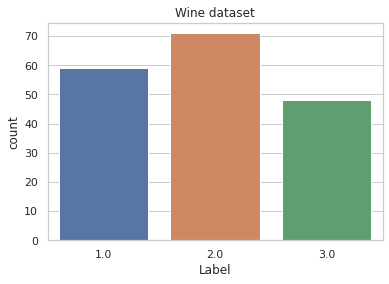

In [11]:
sns.countplot(data['Label']).set_title("Wine dataset")

In [12]:
data['Label'].value_counts()

2.0    71
1.0    59
3.0    48
Name: Label, dtype: int64

O dataset possui classes desbalanceadas visto que a classe 2 é a que possui mais dados e a classe 3 possui menos.

In [13]:
data.describe()

,Label,Alcohol,Malic Acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


    * Cálculo e plot da matriz de correlação

Text(0.5, 1.0, 'Matriz de correlação do Wine')

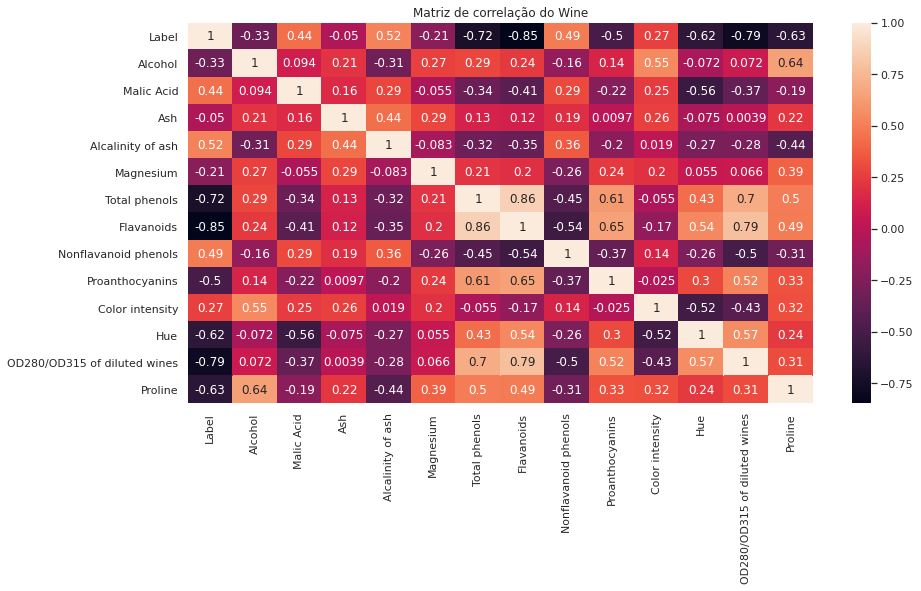

In [14]:
plt.figure(figsize = (14,7))
sns.heatmap(data.corr(), color = 'k', annot = True).set_title("Matriz de correlação do Wine")

É possivel ver que alguns dados possuem grandes correlações positiva com outras variáveis ("Total phenols" e "Flavanoids" por exemplo), algumas negativas e alguns dados possuem correlação quase nula com outros.

    * Pairplot do dataset para melhor visualização das caracteristicas de correlação

In [15]:
pair_plot = sns.pairplot(data, hue = "Label", palette = "brg")
pair_plot.fig.suptitle("Pairplot do dataset Wine", fontsize = 15, x = 0.475, y = 1.01)

Output hidden; open in https://colab.research.google.com to view.

Aqui é possivel ver de forma mais gráfica as correlações mostradas no heatmap acima. É possivel ver mais nitidamente a relação linear que "Total phenols" e "Flavanoids" possue e a pouca correlação que muitos dados possuem entre si como "Alcalinity of ash" e "Magnesium"

#### 5. Encontrando o melhor valor de vizinhos (n_neighbors)

    * Será a separação dos previsores e das classes

In [16]:
features = data.iloc[:, 1:].values
target = data.iloc[:, 0].values

    * Encontrando o melhor valor de "n_neighbors"

In [17]:
#Escolhendo o valor máximo de n_neighbors(k)
k_max = int(round(np.sqrt(len(target))))   #O "k" é geralmente escolhido pela raiz quadrada da quantidades de dados usados para o treino

print(f"k máximo wine = {k_max}")

k máximo wine = 13


Text(0, 0.5, 'Accuracy')

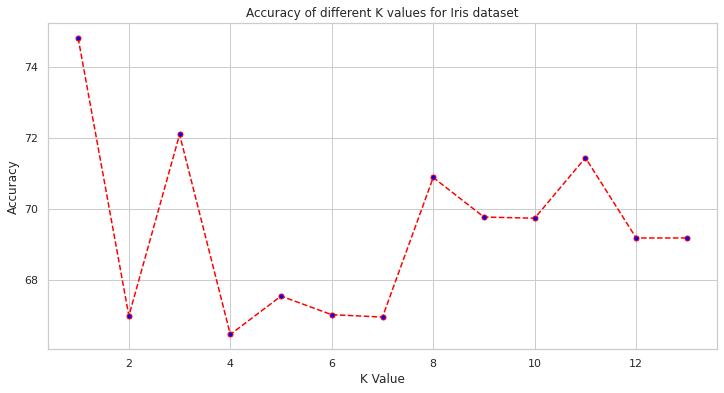

In [30]:
#Plotando o gráfico de acurácia do iris
accuracy_list = KNN_k_find(features, target, k_max)
plt.figure(figsize=(12, 6))
plt.plot(range(1, k_max + 1), accuracy_list, color = 'red', linestyle = 'dashed', marker = 'o', markerfacecolor = 'blue', markersize = 5)
plt.title('Accuracy of different K values for Iris dataset')
plt.xlabel('K Value')
plt.ylabel('Accuracy')

O melhor valor de do parâmetro "n_neighbors" é 3. Ele será utilizado para criar o classificador.

#### 6. Validação cruzada


Método 1: Validação cruzada k-fold

*   O método "kfold" divide o dataset em uma quantidade de grupos determinadas pela variável "n_splits". Destes grupos, o primeiro é escolhido como a parte de teste e os grupos restantes serão usados para treino. A partir disto, é feito o calculo de precisão e ele é armazenado em uma lista. Na proxima iteração, o grupo seguinte é então usado para teste e o resto para treino e isto acontece até todos os grupos serem usados para teste.
Com todos os resultados armazenados em uma lista, pega-se a média entre eles para o valor de precisão do modelo.



In [31]:
kfold = KFold(n_splits = 10)
Classificador_kfold = KNN(n_neighbors = 3)
results_kfold = cross_val_score(Classificador_kfold, features, target, cv = kfold)
print("Pontuação de precisão kfold: {}%".format(round(results_kfold.mean()*100, 4)))
print(results_kfold)

Pontuação de precisão kfold: 64.8693%
[0.94444444 0.77777778 0.77777778 0.61111111 0.44444444 0.72222222
 0.83333333 0.61111111 0.35294118 0.41176471]


Método 2: Validação cruzada Leave One Out


*   O "*Leave One Out*" é uma exceção do "*kfold*" em que a quantidade de grupos é igual a quantidade de dados, ou seja, igual a quantidade de linhas do dataset. Deste modo, uma única linha é tirada para teste (dando o nome da técnica) e o restante é usada para treino até que todos os dados tenham sido usado para teste. Devido ao jeito como funciona, é um método de alto custo computacional. 


In [32]:
L1O = LeaveOneOut()
Classificador_L1O = KNN(n_neighbors = 3)
results_L1O = cross_val_score(Classificador_L1O, features, target, cv = L1O)
print("Pontuação de precisão Leave One Out: {}%".format(round(results_L1O.mean()*100, 4)))
print(results_L1O)

Pontuação de precisão Leave One Out: 72.4719%
[1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1.
 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 0. 1. 1. 1. 1. 1. 0. 0. 0. 1.
 0. 0. 0. 1. 1. 0. 0. 1. 1. 0. 1. 0. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 0.
 0. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1.
 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 0. 1. 0. 1. 1. 0. 1. 1.
 0. 1. 0. 1. 1. 1. 1. 0. 0. 0. 1. 1. 0. 0. 1. 1. 0. 0. 1. 0. 1. 1. 1. 0.
 1. 1. 1. 0. 1. 1. 1. 0. 0. 1.]


#### 7. Resultados

In [33]:
index = ["Iris Dataset", "Wine Dataset"]
columns = ["K-fold", "Leave One Out"]
pd.DataFrame(([93.3333, 96.6667], [64.8693, 72.4719]), index = index, columns = columns)

,K-fold,Leave One Out
Iris Dataset,93.3333,96.6667
Wine Dataset,64.8693,72.4719
